## 正規表現
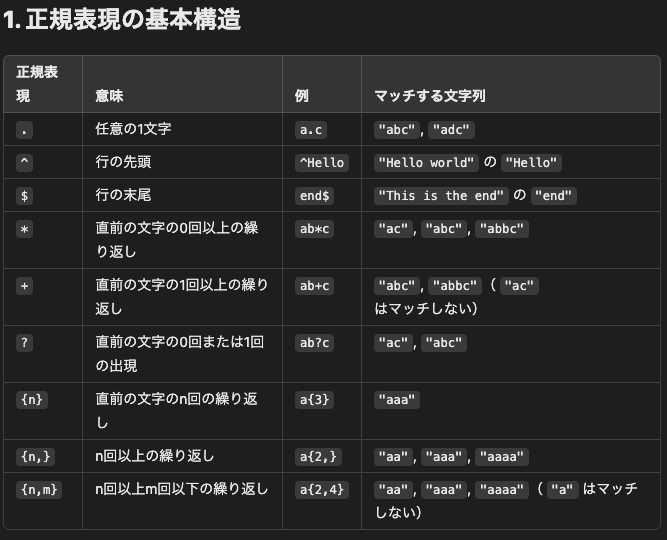  
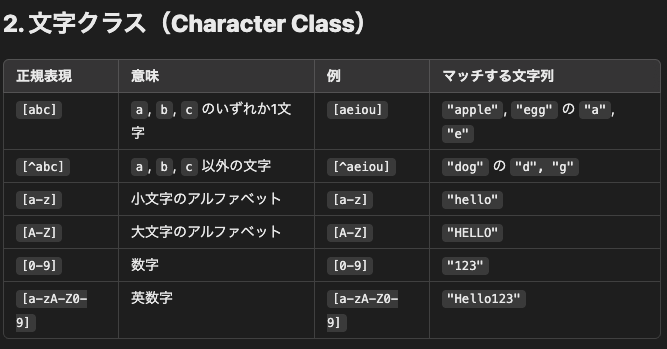  
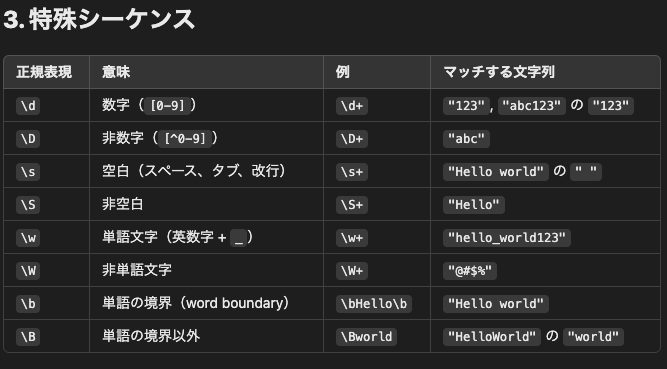  
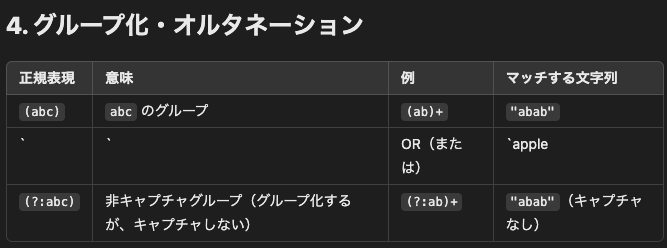  
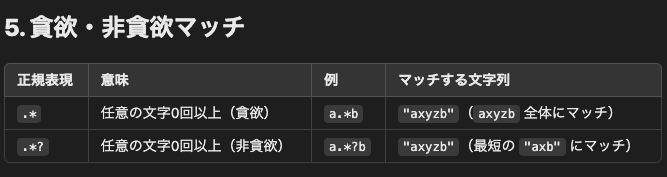

### 20. JSONデータの読み込み

In [8]:
import gzip
import json

filename = "Jawiki Country Data.json.gz"

def get_uk_text(filename):
    with gzip.open(filename, "rt", encoding="utf-8") as f:
        for line in f:
            article = json.loads(line)
            if article["title"] == "イギリス":
                return article["text"]

uk_text = get_uk_text(filename)
print(uk_text[:1000])

{{redirect|UK}}
{{redirect|英国|春秋時代の諸侯国|英 (春秋)}}
{{Otheruses|ヨーロッパの国|長崎県・熊本県の郷土料理|いぎりす}}
{{基礎情報 国
|略名  =イギリス
|日本語国名 = グレートブリテン及び北アイルランド連合王国
|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
|国旗画像 = Flag of the United Kingdom.svg
|国章画像 = [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
|国章リンク =（[[イギリスの国章|国章]]）
|標語 = {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Die

### 21. カテゴリ名を含む行を抽出

In [11]:
import re

categories = re.findall(r"^\[\[Category:.*\]\]$", uk_text, re.MULTILINE)
print("\n".join(categories))

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


### 22. カテゴリ名の抽出

In [18]:
category_names = [re.sub(r"\[\[Category:(.*?)(\|.*)?\]\]$", r"\1", line) for line in categories]
print("\n".join(category_names))

イギリス
イギリス連邦加盟国
英連邦王国
G8加盟国
欧州連合加盟国
海洋国家
現存する君主国
島国
1801年に成立した国家・領域


### 23. セクション構造

In [21]:
sections = re.findall(r"^(=+)\s*(.*?)\s*\1$", uk_text, re.MULTILINE)

for section in sections:
    level = len(section[0]) - 1
    print(f"レベル {level}: {section[1]}")

レベル 1: 国名
レベル 1: 歴史
レベル 1: 地理
レベル 2: 主要都市
レベル 2: 気候
レベル 1: 政治
レベル 2: 元首
レベル 2: 法
レベル 2: 内政
レベル 2: 地方行政区分
レベル 2: 外交・軍事
レベル 1: 経済
レベル 2: 鉱業
レベル 2: 農業
レベル 2: 貿易
レベル 2: 不動産
レベル 2: エネルギー政策
レベル 2: 通貨
レベル 2: 企業
レベル 3: 通信
レベル 1: 交通
レベル 2: 道路
レベル 2: 鉄道
レベル 2: 海運
レベル 2: 航空
レベル 1: 科学技術
レベル 1: 国民
レベル 2: 言語
レベル 2: 宗教
レベル 2: 婚姻
レベル 2: 移住
レベル 2: 教育
レベル 2: 医療
レベル 1: 文化
レベル 2: 食文化
レベル 2: 文学
レベル 2: 哲学
レベル 2: 音楽
レベル 3: ポピュラー音楽
レベル 2: 映画
レベル 2: コメディ
レベル 2: 国花
レベル 2: 世界遺産
レベル 2: 祝祭日
レベル 2: スポーツ
レベル 3: サッカー
レベル 3: クリケット
レベル 3: 競馬
レベル 3: モータースポーツ
レベル 3: 野球
レベル 3: カーリング
レベル 3: 自転車競技
レベル 1: 脚注
レベル 1: 関連項目
レベル 1: 外部リンク


### 24. ファイル参照の抽出

In [24]:
media_files = re.findall(r"\[\[ファイル:(.+?)\|", uk_text)
print("\n".join(media_files))

Royal Coat of Arms of the United Kingdom.svg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadium, illuminated.jpg


### 25. テンプレートの抽出

In [27]:
infobox_match = re.search(r"{{基礎情報.*?\n(.*?)\n}}", uk_text, re.DOTALL)

if infobox_match:
    infobox_text = infobox_match.group(1)
    infobox_dict = {match[0]: match[1] for match in re.findall(r"\|(.+?)\s*=\s*(.+)", infobox_text)}
    print(infobox_dict)
    

{'略名': 'イギリス', '日本語国名': 'グレートブリテン及び北アイルランド連合王国', '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />', '国旗画像': 'Flag of the United Kingdom.svg', '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]', '国章リンク': '（[[イギリスの国章|国章]]）', '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）', '国歌': "[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}", '地図画像': 'Europe-UK.svg', '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg', '公用語': '[[英語]]', '首都': '[[ロンドン]]（事実上）', '最大都市': 'ロンドン', '元首等肩書': '[[イギリスの君主|女王]]', '元首等氏名': '[[エリザベス2世]]', '首相等肩書': '[[イギリスの首相|首相]]', '首相等氏名': '[[ボリス・ジョンソン]]', '他元首等肩書1': '[[貴族院 (イギリス)|貴族院議長]]', '他元首等氏名1': '[[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]', '他元首等肩書2': '[[庶民院 (イギリス)|庶民院議長]]', '他元首等氏名2': '{{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}', '他元首等肩書

### 26. 強調マークアップの除去

In [30]:
def remove_emphasis(text):
    return re.sub(r"''+(.+?)''+", r"\1", text)

infobox_dict = {key: remove_emphasis(value) for key, value in infobox_dict.items()}
print(infobox_dict)

{'略名': 'イギリス', '日本語国名': 'グレートブリテン及び北アイルランド連合王国', '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />', '国旗画像': 'Flag of the United Kingdom.svg', '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]', '国章リンク': '（[[イギリスの国章|国章]]）', '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）', '国歌': '[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}', '地図画像': 'Europe-UK.svg', '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg', '公用語': '[[英語]]', '首都': '[[ロンドン]]（事実上）', '最大都市': 'ロンドン', '元首等肩書': '[[イギリスの君主|女王]]', '元首等氏名': '[[エリザベス2世]]', '首相等肩書': '[[イギリスの首相|首相]]', '首相等氏名': '[[ボリス・ジョンソン]]', '他元首等肩書1': '[[貴族院 (イギリス)|貴族院議長]]', '他元首等氏名1': '[[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]', '他元首等肩書2': '[[庶民院 (イギリス)|庶民院議長]]', '他元首等氏名2': '{{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}', '他元首等肩書3': 

### 27. 内部リンクの除去

In [37]:
def remove_internal_links(text):
    return re.sub(r"\[\[(?:[^|\]]*\|)?([^|\]]+)\]\]", r"\1", text)

infobox_dict = {key: remove_internal_links(value) for key, value in infobox_dict.items()}
print(infobox_dict)

{'略名': 'イギリス', '日本語国名': 'グレートブリテン及び北アイルランド連合王国', '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />', '国旗画像': 'Flag of the United Kingdom.svg', '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]', '国章リンク': '（国章）', '標語': '{{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）', '国歌': '[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}', '地図画像': 'Europe-UK.svg', '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg', '公用語': '英語', '首都': 'ロンドン（事実上）', '最大都市': 'ロンドン', '元首等肩書': '女王', '元首等氏名': 'エリザベス2世', '首相等肩書': '首相', '首相等氏名': 'ボリス・ジョンソン', '他元首等肩書1': '貴族院議長', '他元首等氏名1': 'ノーマン・ファウラー', '他元首等肩書2': '庶民院議長', '他元首等氏名2': '{{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}', '他元首等肩書3': '最高裁判所長官', '他元首等氏名3': 'ブレンダ・ヘイル', '面積順位': '76', '面積大きさ': '1 E11', '面積値': '244,820', '水面積率': '1.3%', '人口統計年': '2018', '人口順位': '22', '人口大きさ': '1 E7', '人口値

### 28. MediaWikiマークアップの除去

In [44]:
def remove_markup(text):
    text = remove_emphasis(text)
    text = remove_internal_links(text)
    text = re.sub(r"<.*?>", "", text) 
    text = re.sub(r"\{\{.*?\}\}", "", text)
    text = re.sub(r"\[https?://[^\]]+\]", "", text)
    return text.strip()

infobox_dict = {key: remove_markup(value) for key, value in infobox_dict.items()}
print(infobox_dict)


{'略名': 'イギリス', '日本語国名': 'グレートブリテン及び北アイルランド連合王国', '公式国名': '英語以外での正式国名:', '国旗画像': 'Flag of the United Kingdom.svg', '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]', '国章リンク': '（国章）', '標語': '（フランス語:神と我が権利）', '国歌': '[[女王陛下万歳|]]神よ女王を護り賜え', '地図画像': 'Europe-UK.svg', '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg', '公用語': '英語', '首都': 'ロンドン（事実上）', '最大都市': 'ロンドン', '元首等肩書': '女王', '元首等氏名': 'エリザベス2世', '首相等肩書': '首相', '首相等氏名': 'ボリス・ジョンソン', '他元首等肩書1': '貴族院議長', '他元首等氏名1': 'ノーマン・ファウラー', '他元首等肩書2': '庶民院議長', '他元首等氏名2': '', '他元首等肩書3': '最高裁判所長官', '他元首等氏名3': 'ブレンダ・ヘイル', '面積順位': '76', '面積大きさ': '1 E11', '面積値': '244,820', '水面積率': '1.3%', '人口統計年': '2018', '人口順位': '22', '人口大きさ': '1 E7', '人口値': '6643万5600', '人口密度値': '271', 'GDP統計年元': '2012', 'GDP値元': '1兆5478億', 'GDP統計年MER': '2012', 'GDP順位MER': '6', 'GDP値MER': '2兆4337億', 'GDP統計年': '2012', 'GDP順位': '6', 'GDP値': '2兆3162億', 'GDP/人': '36,727', '建国形態': '建国', '確立形態1': 'イングランド王国／スコットランド王国（両国とも1707年合同法まで）',

### 29. 国旗画像のURLを取得

In [47]:
import requests

def get_flag_url(image_name):
    base_url = "https://commons.wikimedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "imageinfo",
        "titles": f"File:{image_name}",
        "iiprop": "url"
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    pages = data["query"]["pages"]
    return next(iter(pages.values()))["imageinfo"][0]["url"]

flag_filename = infobox_dict.get("国旗画像")
if flag_filename:
    flag_url = get_flag_url(flag_filename)
    print(flag_url)


https://upload.wikimedia.org/wikipedia/commons/8/83/Flag_of_the_United_Kingdom_%283-5%29.svg
